# Supervised Machine Learning by Athirah Z.

## Multidimensional linear regression
The ``LinearRegression`` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form

$$y=\beta_0+\beta_1x_1+\beta_2x_2+⋯+\beta_nx_n$$

where there are multiple $x$ values. Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize. Nonetheless, the general steps for fitting a model to data outlined for the one-dimensional case above remain the same.

$$y=\beta_0+\beta_1x_1+\beta_2x_2+⋯+\beta_nx_n$$
Example for below
$$y=c+1.5x_1-2x_2+x_n$$


In [32]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
# b0 = 0.5, b1 = 1.5, b2 = -2, b3 = 1
y = 0.5 + 1.5 * X[:, 0] - 2 * X[:, 1] + 1 * X[:, 2] + np.random.randn(100)

#create and fit
model = LinearRegression()
model.fit(X, y)
yfit=model.predict(X)

print("Intercept:    {}".format(model.intercept_))
print("Coefficients: {}".format(model.coef_))

Intercept:    0.6592184003314936
Coefficients: [ 1.50724916 -2.00572194  1.0024234 ]


In [33]:
X.shape

(100, 3)

In [36]:
print("Intercept:    {}".format(model.intercept_))
print("Coefficients: {}".format(model.coef_))
print("MSE: {}". format(mean_squared_error(y,yfit)))
print("R-squares: {}". format(r2_score(y,yfit)))

Intercept:    0.6592184003314936
Coefficients: [ 1.50724916 -2.00572194  1.0024234 ]
MSE: 0.949941995029337
R-squares: 0.9857414310934378


In [37]:
print("Coefficients: {}".format(model.coef_[0]))

Coefficients: 1.5072491617476702


### Exercise - Effects of Advertising on Sales

Imagine that your company wants to increase sales on a certain product. You cannot increase sales directly, but you can adjust advertising.

The advertising dataset in the file `data/advertising.csv` contains information on money spent on advertising via various channels as well as revenue for a product. Each row represents a separate time interval, e.g. a week's worth of sales. For the sake of simplicity we'll ignore confounding factors like seasonality.

The features are:
- TV: advertising dollars spent on TV
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

and the response is:
- Sales: sales of a single product in a given market

All numbers are in thousands of dollars, e.g. 14.4 is equivalent to \$14,400.

In [41]:
sales = pd.read_csv("../data/advertising.csv", index_col=0)
sales.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


TV ad intercept: 7.032593549127693
TV ad slope:     0.047536640433019764
R2 for TV:       0.611875050850071


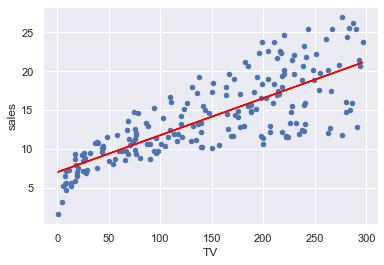

In [70]:
model_tv = LinearRegression().fit(sales[["TV"]], sales["sales"])
print("TV ad intercept: {}".format(model_tv.intercept_))
print("TV ad slope:     {}".format(model_tv.coef_[0]))

r2score_tv = r2_score(sales["sales"], model_tv.predict(sales[["TV"]]))
print("R2 for TV:       {}".format(r2score_tv))

sales.plot(x="TV", y="sales", kind="scatter")
plt.plot(sales[["TV"]], model_tv.predict(sales[["TV"]]), c='red');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Radio ad intercept: 9.311638095158283
Radio ad slope:     [0.20249578]
R2 for Radio:       0.33203245544529525


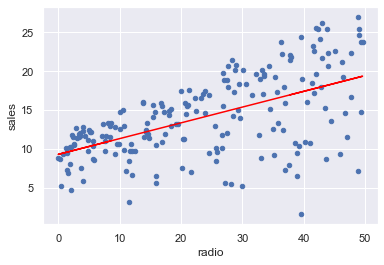

In [71]:
model_radio = LinearRegression().fit(sales[["radio"]], sales["sales"])
r2score_radio = r2_score(sales["sales"],model_radio.predict(sales[["radio"]]))

sales.plot("radio", "sales", "scatter")
plt.plot(sales[["radio"]], model_radio.predict(sales[["radio"]]), 'red');

print("Radio ad intercept: {}".format(model_radio.intercept_))
print("Radio ad slope:     {}".format(model_radio.coef_))
print("R2 for Radio:       {}".format(r2score_radio))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Newspaper ad intercept: 12.35140706927816
Newspaper ad slope:     [0.0546931]
R2 for newspaper:       0.05212044544430516


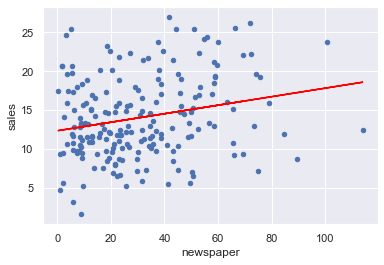

In [72]:
model_np = LinearRegression().fit(sales[["newspaper"]], sales["sales"])
r2score_np = r2_score(sales["sales"],model_np.predict(sales[["newspaper"]]))

sales.plot("newspaper", "sales", "scatter")
plt.plot(sales[["newspaper"]], model_np.predict(sales[["newspaper"]]), 'red');

print("Newspaper ad intercept: {}".format(model_np.intercept_))
print("Newspaper ad slope:     {}".format(model_np.coef_))
print("R2 for newspaper:       {}".format(r2score_np))

In [ ]:
# you can do this too / alternative

X=sales[["TV"]]
Y=sales["sales"]

model_tv = LinearRegression()
model_tv.fit(X,Y)
print("TV ad intercept: {}".format(model_tv.intercept_))
print("TV ad slope:     {}".format(model_tv.coef_))


yfit = model_tv.predict(X)
r2score_tv = r2_score(Y,yfit)
print("R2 for TV:       {}".format(r2score_tv))

plt.scatter(X,Y)
plt.xlabel("TV ad cost")
plt.ylabel("Sales");
plt.plot(X, yfit, c='red');

**Discussion questions:**

#### Which ad types have the strongest and weakest influence on sales?

The R2 score indicates how good a fit is and therefore how strong a feature's influence is.
A low R2 score means that the model is extremely unreliable and a large fraction of the variation
in the target values (i.e. sales) cannot be explained by the model. That means even if we 
increased the budget for newspaper ads, we can't be sure that would actually lead to an 
increase in sales. A look at the plot above shows that there is virtually no correlation between 
sales and newspaper ad budget.

On the other hand, the budget for TV predict sales quite accurately, i.e. the model trained only on 
the TV ad budget explains a large fraction of the variance in the sales numbers. We can be reasonably
certain that an increase in the TV ad budget will lead to an increase in sales.


#### For each ad type, how much is the expected sales given an additional budget of 10 thousand dollar for that ad type?

If the target value, sales, is expressed as
sales = intercept_ + coef_ * ad_budget
then the slope (coef_) indicates how much the sales value changes when ad_budget changes.
The increase in expected sales can be determined via

  sales = intercept_ + coef_ * (ad_budget + 10)
  
        = intercept_ + coef_ * ad_budget + 10 * coef_
        
        
So that an increase of 10k in an advertisement's budget leads to an increase of 10 * coef_ in sales

In [73]:
sale_pred1 = model_tv.intercept_ +  model_tv.coef_*X
sale_pred2 = sale_pred1 + model_tv.coef_*10

In [74]:
# for TV
model_tv.coef_ * (10)  #increase

array([0.4753664])

In [75]:
# for radio
model_radio.coef_ * (10)       # increase

array([2.02495783])

In [77]:
# for newspaper
model_np.coef_ * (10)       # increase

array([0.54693098])

Let's see if we can improve the model performance with a multiple linear regression
- Train a multiple linear regression model on all ad types simultaneously. How well does it perform?
- How do the coefficients change versus the simple linear regression?

In [79]:
# MC
model = LinearRegression().fit(sales[["TV", "radio", "newspaper"]], sales["sales"])

r2score = r2_score(sales["sales"], model.predict(sales[["TV", "radio", "newspaper"]]))
print("R2 of MLR:        {}".format(r2score))
print()
print("TV ad SLR:        {}".format(model_tv.coef_[0]))
print("TV ad MLR:        {}".format(model.coef_[0]))
print()
print("Radio ad SLR:     {}".format(model_radio.coef_[0]))
print("Radio ad MLR:     {}".format(model.coef_[1]))
print()
print("Newspaper ad SLR: {}".format(model_np.coef_[0]))
print("Newspaper ad MLR: {}".format(model.coef_[2]))

R2 of MLR:        0.8972106381789522

TV ad SLR:        0.047536640433019764
TV ad MLR:        0.04576464545539761

Radio ad SLR:     0.20249578339243965
Radio ad MLR:     0.18853001691820462

Newspaper ad SLR: 0.05469309847227336
Newspaper ad MLR: -0.0010374930424762972


- What are the expected sales given a new budget of TV=100, Radio=25 and Newspaper=25?

In [80]:
model.predict(X=[[100, 25, 25]])

array([12.20266701])

# Feature Scaling


#### Standardisation:

$$x_{scaled} = \frac{x - \bar {x}}{s}$$

Where $\bar{x} =  mean(x)$, and $s = std(x)$.

Therefore, $mean(x_{scaled}) = 0$ , and $std(x_{scaled}) = 1$. 
In case of presence of outliers for the feature x, this method is not helpful to set the range of $x_{scaled}$. 


#### Min-Max Scaling: 

$$x_{scaled}=\frac{x-x_{min}}{x_{max} - x_{min}} $$

Therefore, $range(x_{scaled}) = [0 , 1]$


#### Mapping to a Gaussian distribution, PowerTransformer:

PowerTransformer aims to map data from any distribution to as close to a Gaussian (Normal) distribution as possible in order to stabilize variance and minimize skewness. In general, you'll only want to normalize your data if you're going to use a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include t-tests, ANOVAs, linear regression, and Gaussian naive Bayes. 


### Feature Scaling in Python:

For each scaling methods "Standardisation" and Min-Max Scaling, we can call the relevant methods from `sklearn.preprocessing`. 


#### Standardisation in Python:

`from sklearn.preprocessing import StandardScaler`

`scaler = StandardScaler().fit(x)`

`x_scaled = scaler.transform(x)`


#### Min-Max Scaling in Python: 

`from sklearn.preprocessing import MinMaxScaler`

`scaler = MinMaxScaler().fit(x)`

`x_scaled = scaler.transform(x)`


#### Mapping to a Gaussian distribution, PowerTransformer:

`from sklearn.preprocessing import PowerTransformer`

`pt = PowerTransformer(method='box-cox', standardize=True)`

In PowerTransformer, you need to set the hyperparameter `method='box-cox'` if the data is positive. For negative data you need to set `method='yeo-johnson'`. Hyperparameter `standardize=True` applies zero-mean, unit-variance normalization to the transformed output.

`x_scaled = pt.fit_transform(x)` 

In [82]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

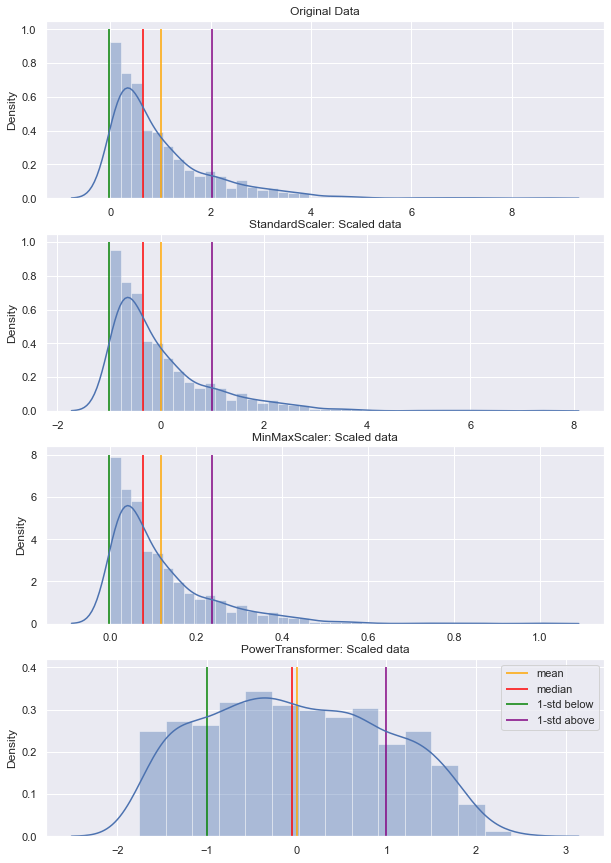

In [83]:
# set seed for reproducibility
np.random.seed(0)

# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)[:,np.newaxis]

# StandardScaler scale the data between 0 and 1
scaler_std = StandardScaler().fit(original_data)
scaled_std = scaler_std.transform(original_data)

# MinMaxScaler scale the data between 0 and 1
scaler_Mm = MinMaxScaler().fit(original_data)
scaled_Mm = scaler_Mm.transform(original_data)

# MinMaxScaler scale the data between 0 and 1
scaler_PT = PowerTransformer().fit(original_data)
scaled_PT = scaler_PT.transform(original_data)

# plot both together to compare
fig, ax=plt.subplots(4,1)
fig.set_size_inches(10, 15)

sns.distplot(original_data, ax=ax[0])
ax[0].vlines(np.mean(original_data), ymin = 0, ymax = 1, 
                               color = 'orange', label = 'mean')
ax[0].vlines(np.median(original_data), ymin = 0, ymax = 1, 
                            color = 'red', label = 'median')
ax[0].vlines(np.mean(original_data) - np.std(original_data, ddof = 1), ymin = 0, ymax = 1, 
                               color = 'green', label = '1-std below')
ax[0].vlines(np.mean(original_data) + np.std(original_data, ddof = 1), ymin = 0, ymax = 1, 
                               color = 'purple', label = '1-std above')
ax[0].set_title("Original Data")


sns.distplot(scaled_std, ax=ax[1])
ax[1].set_title("StandardScaler: Scaled data")
ax[1].vlines(np.mean(scaled_std), ymin = 0, ymax = 1, 
                               color = 'orange', label = 'mean')
ax[1].vlines(np.median(scaled_std), ymin = 0, ymax = 1, 
                            color = 'red', label = 'median')
ax[1].vlines(np.mean(scaled_std) - np.std(scaled_std, ddof = 1), ymin = 0, ymax = 1, 
                               color = 'green', label = '1-std below')
ax[1].vlines(np.mean(scaled_std) + np.std(scaled_std, ddof = 1), ymin = 0, ymax = 1, 
                               color = 'purple', label = '1-std above')


sns.distplot(scaled_Mm, ax=ax[2])
ax[2].set_title("MinMaxScaler: Scaled data")
ax[2].vlines(np.mean(scaled_Mm), ymin = 0, ymax = 8, 
                               color = 'orange', label = 'mean')
ax[2].vlines(np.median(scaled_Mm), ymin = 0, ymax = 8, 
                            color = 'red', label = 'median')
ax[2].vlines(np.mean(scaled_Mm) - np.std(scaled_Mm, ddof = 1), ymin = 0, ymax = 8, 
                               color = 'green', label = '1-std below')
ax[2].vlines(np.mean(scaled_Mm) + np.std(scaled_Mm, ddof = 1), ymin = 0, ymax = 8, 
                               color = 'purple', label = '1-std above')


sns.distplot(scaled_PT, ax=ax[3])
ax[3].set_title("PowerTransformer: Scaled data")
ax[3].vlines(np.mean(scaled_PT), ymin = 0, ymax = .4, 
                               color = 'orange', label = 'mean')
ax[3].vlines(np.median(scaled_PT), ymin = 0, ymax = .4, 
                            color = 'red', label = 'median')
ax[3].vlines(np.mean(scaled_PT) - np.std(scaled_PT, ddof = 1), ymin = 0, ymax = .4, 
                               color = 'green', label = '1-std below')
ax[3].vlines(np.mean(scaled_PT) + np.std(scaled_PT, ddof = 1), ymin = 0, ymax = .4, 
                               color = 'purple', label = '1-std above')

plt.legend()
plt.show()

**Example: Impact of scaling on sales dataset**

In [84]:
X = sales[["TV", "radio", "newspaper"]]
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [97]:
scaled_X = PowerTransformer().fit_transform(X)
scaled_X[:4,:]

array([[ 0.94867429,  0.96224689,  1.51433531],
       [-1.19131426,  1.0401788 ,  0.78768252],
       [-1.6477566 ,  1.37070964,  1.51699753],
       [ 0.14102023,  1.14238689,  1.21465643]])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


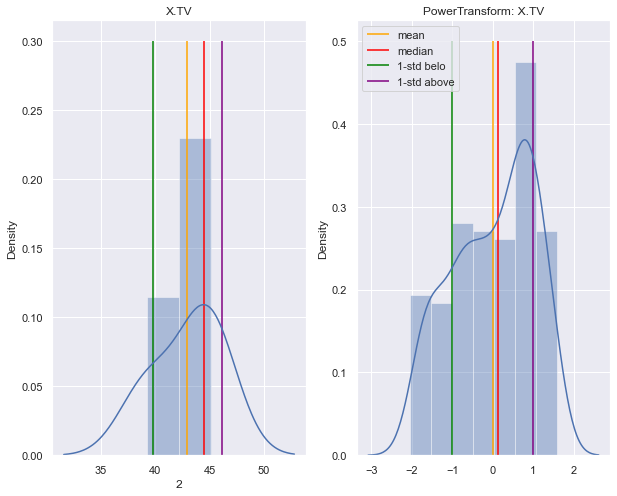

In [98]:
# plot both together to compare
fig, ax=plt.subplots(1,2)
fig.set_size_inches(10, 8)

sns.distplot(X.iloc[1,:], ax=ax[0])
ax[0].vlines(np.mean(X.iloc[1,:]), ymin = 0, ymax = .3, 
                               color = 'orange', label = 'mean')
ax[0].vlines(np.median(X.iloc[1,:]), ymin = 0, ymax = .3, 
                            color = 'red', label = 'median')
ax[0].vlines(np.mean(X.iloc[1,:]) - np.std(X.iloc[1,:], ddof = 1), ymin = 0, ymax = .3, 
                               color = 'green', label = '1-std below')
ax[0].vlines(np.mean(X.iloc[1,:]) + np.std(X.iloc[1,:], ddof = 1), ymin = 0, ymax = .3, 
                               color = 'purple', label = '1-std above')
ax[0].set_title("X.TV")


sns.distplot(scaled_X[:,0], ax=ax[1])
ax[1].set_title("PowerTransform: X.TV")
ax[1].vlines(np.mean(scaled_X[:,0]), ymin = 0, ymax = .5, 
                               color = 'orange', label = 'mean')
ax[1].vlines(np.median(scaled_X[:,0]), ymin = 0, ymax = .5, 
                            color = 'red', label = 'median')
ax[1].vlines(np.mean(scaled_X[:,0]) - np.std(scaled_X[:,0], ddof = 1), ymin = 0, ymax = .5, 
                               color = 'green', label = '1-std belo')
ax[1].vlines(np.mean(scaled_X[:,0]) + np.std(scaled_X[:,0], ddof = 1), ymin = 0, ymax = .5, 
                               color = 'purple', label = '1-std above')

plt.legend()
plt.show()

In [101]:
model = LinearRegression().fit(X, sales["sales"])

r2score = r2_score(sales["sales"], model.predict(X))
print("R2 of MLR :        {}".format(r2score))
print("MSE of MLR:        {}".format(mean_squared_error(sales["sales"], model.predict(X))))


print()
print("TV ad MLR :        {}".format(model.coef_[0]))
print()
print("Radio ad MLR:     {}".format(model.coef_[1]))
print()
print("Newspaper ad MLR: {}".format(model.coef_[2]))

R2 of MLR :        0.8972106381789522
MSE of MLR:        2.784126314510936

TV ad MLR :        0.04576464545539761

Radio ad MLR:     0.18853001691820462

Newspaper ad MLR: -0.0010374930424762972


In [100]:
model_scaled = LinearRegression().fit(scaled_X, sales["sales"])

r2score = r2_score(sales["sales"], model_scaled.predict(scaled_X))
print("R2 of MLR:        {}".format(r2score))
print("MSE of MLR:        {}".format(mean_squared_error(sales["sales"], model_scaled.predict(scaled_X))))


print()
print("TV ad MLR:        {}".format(model_scaled.coef_[0]))
print()
print("Radio ad MLR:     {}".format(model_scaled.coef_[1]))
print()
print("Newspaper ad MLR: {}".format(model_scaled.coef_[2]))

R2 of MLR:        0.9074639862122942
MSE of MLR:        2.5064067571002666

TV ad MLR:        3.9707553863143206

Radio ad MLR:     2.764248080722213

Newspaper ad MLR: 0.0643293016332074


## Handling Categorical Predictors with Two Categories

Up to now, all of our predictors have been numeric. What if one of our predictors was categorical?

Let's create a new feature called **Size**, and randomly assign observations to be **small or large**:

In [103]:
sales.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [108]:
# set a seed for reproducibility
np.random.seed(42)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(sales))
mask_large = nums > 0.5

# initially set Size to s mall, then change roughly half to be large
sales_size = sales.copy()
sales_size['Size'] = 'small'
sales_size.loc[mask_large, 'Size'] = 'large'
sales_size.head()

,TV,radio,newspaper,sales,Size
1,230.1,37.8,69.2,22.1,small
2,44.5,39.3,45.1,10.4,large
3,17.2,45.9,69.3,9.3,large
4,151.5,41.3,58.5,18.5,large
5,180.8,10.8,58.4,12.9,small


In [111]:
# create a new Series called IsLarge
size_dummies = pd.get_dummies(sales_size.Size, prefix='Size')
size_dummies1 = size_dummies.iloc[:, 1]
size_dummies.head()

,Size_large,Size_small
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1


In [124]:
size_dummies1 = size_dummies.iloc[:, 1]
sales_size1 = pd.concat([sales_size, size_dummies1], axis=1)
sales_size1.head()

,TV,radio,newspaper,sales,Size,Size_small
1,230.1,37.8,69.2,22.1,small,1
2,44.5,39.3,45.1,10.4,large,0
3,17.2,45.9,69.3,9.3,large,0
4,151.5,41.3,58.5,18.5,large,0
5,180.8,10.8,58.4,12.9,small,1


In [125]:
#MC 
size_dummies0 = size_dummies.iloc[:, 0]
sales_size2 = pd.concat([sales_size, size_dummies0], axis=1)
sales_size2.head()

,TV,radio,newspaper,sales,Size,Size_large
1,230.1,37.8,69.2,22.1,small,0
2,44.5,39.3,45.1,10.4,large,1
3,17.2,45.9,69.3,9.3,large,1
4,151.5,41.3,58.5,18.5,large,1
5,180.8,10.8,58.4,12.9,small,0


In [120]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'Size_small']
X = sales_size1[feature_cols]
y = sales.sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
result = zip(feature_cols, lm.coef_)
resultSet = set(result)
print(resultSet)
print()

r2score = r2_score(sales["sales"], lm.predict(X))
print("R2 of MLR:        {}".format(r2score))
print("MSE of MLR:       {}".format(mean_squared_error(y, lm.predict(X))))



{('TV', 0.045799839396507544), ('Size_small', 0.04564635201792487), ('radio', 0.18841737406834347), ('newspaper', -0.0009987157346825065)}

R2 of MLR:        0.8972294440532784
MSE of MLR:       2.7836169434179383


In [121]:
print("Coefficients: {}".format(lm.coef_))

Coefficients: [ 0.04579984  0.18841737 -0.00099872  0.04564635]


In [126]:
#MC
feature_cols = ['TV', 'radio', 'newspaper', 'Size_large']
X = sales_size2[feature_cols]
y = sales.sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
result = zip(feature_cols, lm.coef_)
resultSet = set(result)
print(resultSet)
print()
r2score = r2_score(
    sales["sales"], lm.predict(X))
print("R2 of MLR:        {}".format(r2score))
print("MSE of MLR:        {}".format(mean_squared_error(y, lm.predict(X))))

{('Size_large', -0.04564635201792487), ('TV', 0.045799839396507544), ('radio', 0.18841737406834347), ('newspaper', -0.0009987157346825065)}

R2 of MLR:        0.8972294440532784
MSE of MLR:        2.783616943417938


## Handling Categorical Predictors with More than Two Categories

Let's create a new feature called **Area**, and randomly assign observations to be **rural, suburban, or urban**:

In [146]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(sales))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
sales_Area = sales_size.copy()
sales_Area['Area'] = 'rural'
sales_Area.loc[mask_suburban, 'Area'] = 'suburban'
sales_Area.loc[mask_urban, 'Area'] = 'urban'
sales_Area.head()

,TV,radio,newspaper,sales,Size,Area
1,230.1,37.8,69.2,22.1,small,rural
2,44.5,39.3,45.1,10.4,large,urban
3,17.2,45.9,69.3,9.3,large,rural
4,151.5,41.3,58.5,18.5,large,urban
5,180.8,10.8,58.4,12.9,small,suburban


In [147]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(sales_Area.Area, prefix='Area').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
sales_Area = pd.concat([sales_Area, area_dummies], axis=1)
sales_Area.head()

,TV,radio,newspaper,sales,Size,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,small,rural,0,0
2,44.5,39.3,45.1,10.4,large,urban,0,1
3,17.2,45.9,69.3,9.3,large,rural,0,0
4,151.5,41.3,58.5,18.5,large,urban,0,1
5,180.8,10.8,58.4,12.9,small,suburban,1,0


Here is how we interpret the coding:
- **rural** is coded as Area_suburban=0 and Area_urban=0
- **suburban** is coded as Area_suburban=1 and Area_urban=0
- **urban** is coded as Area_suburban=0 and Area_urban=1

Let's include the two new dummy variables in the model:

In [148]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'Size', 'Area']
X = sales_Area[feature_cols]
X

,TV,radio,newspaper,Size,Area
1,230.1,37.8,69.2,small,rural
2,44.5,39.3,45.1,large,urban
3,17.2,45.9,69.3,large,rural
4,151.5,41.3,58.5,large,urban
5,180.8,10.8,58.4,small,suburban
...,...,...,...,...,...
196,38.2,3.7,13.8,small,suburban
197,94.2,4.9,8.1,large,urban
198,177.0,9.3,6.4,large,suburban
199,283.6,42.0,66.2,large,rural


In [149]:
X_dummy=pd.get_dummies(X, drop_first=True)
X_dummy

,TV,radio,newspaper,Size_small,Area_suburban,Area_urban
1,230.1,37.8,69.2,1,0,0
2,44.5,39.3,45.1,0,0,1
3,17.2,45.9,69.3,0,0,0
4,151.5,41.3,58.5,0,0,1
5,180.8,10.8,58.4,1,1,0
...,...,...,...,...,...,...
196,38.2,3.7,13.8,1,1,0
197,94.2,4.9,8.1,0,0,1
198,177.0,9.3,6.4,0,1,0
199,283.6,42.0,66.2,0,0,0


In [150]:
y = sales.sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X_dummy, y)

# print coefficients
Results=zip(X_dummy.columns, lm.coef_)
SetResults = set(Results)
print(SetResults)

{('Size_small', 0.06222071661049745), ('TV', 0.04584961686502515), ('radio', 0.1874572257165829), ('newspaper', -0.0009722908491923818), ('Area_urban', 0.24893742682404305), ('Area_suburban', -0.12728485387467364)}


In [151]:
X_dummy.columns

Index(['TV', 'radio', 'newspaper', 'Size_small', 'Area_suburban',
       'Area_urban'],
      dtype='object')

In [152]:
lm.coef_

array([ 0.04584962,  0.18745723, -0.00097229,  0.06222072, -0.12728485,
        0.24893743])

In [153]:
news=10 
Area='suburban'
radio=10
Size='large'
TV=10
yfit=lm.intercept_ + TV*lm.coef_[0] + radio*lm.coef_[1] + news*lm.coef_[2] + 0*lm.coef_[3] + 1*lm.coef_[4] + 0*lm.coef_[5]
yfit

5.084914089199858

In [154]:
lm.predict([[10,10,10, 0,1,0]])

array([5.08491409])

## Using Linear Regression for non-linear relations

Consider the following case.

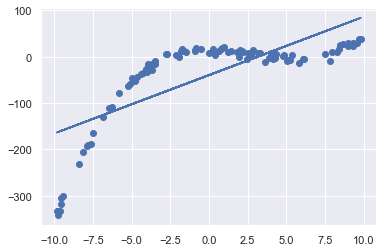

In [155]:
X = (10 * (2 * np.random.rand(100) - 1))[:, np.newaxis]
# b0 = 15, b1 = 0, b2 = -1.7, b3 = 0.2
y = 15 - 1.7 * X**2 + 0.2 * X**3 + np.random.normal(scale=5, size=X.shape)

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred);

### Basis functions

A trick to adapt linear regression to nonlinear relationships between features and targets is to transform the data and generate new features from the existing ones using basis functions. A very common set of basis functions are **polynomial basis functions** $f_n(x) = x^n$, which transform a simple linear regression from

$$ y = \beta_0 + \beta_1 x $$

into

$$ y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \ldots + \beta_n x^n$$

We are free to choose how many polynomials to include. In fact, the basis functions $f(x)$ can be practically anything; we are free to transform features however we deem necessary.

This can, of course, also be extended to multiple linear regression so that, e.g.

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 $$

could become

$$ y = \beta_0 + \beta_{1a} x_1 + \beta_{1b} x_1^2 + \beta_{2a} x_2 + \beta_{2b} x_2^2$$
 
Note that this is still a linear model. Linearity in the context of modelling means that the coefficients $\beta_i$ are only ever added to (or subtracted from) each other. The basis functions $f(x)$ may very well be non-linear, though. For example,

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2 $$

is a linear model, despite the $x_1 x_2$ term, whereas

$$ y = \beta_0 + \frac{\beta_1 x}{\beta_2 + x}$$

is a non-linear model, despite only having one feature, because the coefficients are divided by each other.

**All we are doing is engineering new features to capture nonlinear patterns!**

### Regression with polynomial basis functions

The polynomial basis functions are so common and useful that this transformation is built into Scikit-Learn.

In [156]:
x_1d = np.array([2, 3, 4])[:, np.newaxis]
x_1d

array([[2],
       [3],
       [4]])

In [157]:
from sklearn.preprocessing import PolynomialFeatures

In [158]:
poly = PolynomialFeatures(degree=4, include_bias=False)
poly.fit(x_1d)
x_poly = poly.transform(x_1d)
x_poly

array([[  2.,   4.,   8.,  16.],
       [  3.,   9.,  27.,  81.],
       [  4.,  16.,  64., 256.]])

In [159]:
poly = PolynomialFeatures(degree=4, include_bias=True)
poly.fit(x_1d)
x_poly = poly.transform(x_1d)
x_poly

array([[  1.,   2.,   4.,   8.,  16.],
       [  1.,   3.,   9.,  27.,  81.],
       [  1.,   4.,  16.,  64., 256.]])

In [160]:
from sklearn.pipeline import make_pipeline

In [161]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False), 
    MinMaxScaler(), 
    LinearRegression())
poly_pipeline

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('minmaxscaler', MinMaxScaler()),
                ('linearregression', LinearRegression())])

In [162]:
poly_pipeline.steps

[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=False)),
 ('minmaxscaler', MinMaxScaler()),
 ('linearregression', LinearRegression())]

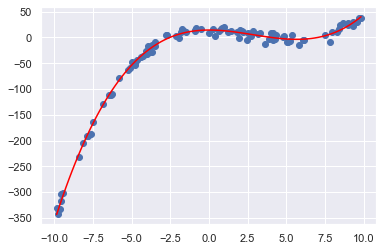

In [163]:
poly_pipeline.fit(X, y)
X_pred = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]
y_pred = poly_pipeline.predict(X_pred)
plt.scatter(X, y)
plt.plot(X_pred, y_pred, c='red');

### A comment on `PolynomialFeatures`
The `PolynomialFeatures` preprocessor doesn't just apply exponents to features but also looks at interaction terms $x_i^n x_j^m$. For example, applying `PolynomialFeatures(degree=2)` to the following linear model:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 $$

will result in:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1^2 + \beta_4 x_2^2 + \beta_5 x_1 x_2$$

`PolynomialFeatures` will generate all interaction terms where the sum of the exponents is less than or equal to `degree`. So applying `PolynomialFeatures(degree=3)` to the linear model above results in:

$$ 
\begin{aligned}
y = \beta_0 &+ \beta_1 x_1 + \beta_2 x_2\\
            &+ \beta_3 x_1^2 + \beta_4 x_2^2\\
            &+ \beta_5 x_1 x_2\\
            &+ \beta_6 x_1^3 + \beta_7 x_2^3\\
            &+ \beta_7 x_1^2 x_2 + \beta_8 x_2^2 x_1\\
\end{aligned}
$$

Keep this in mind when generating polynomial expansions: the number of resulting features can become computationally problematic if `degree` is too large. For example, if we start with 10 features, a polynomial expansion with `degree=4` will result in 1000 features:

In [164]:
x_1d = np.random.randint(low=-5, high=5, size=(5, 10))
x_1d

array([[-3,  1, -3, -3, -3,  1, -2, -2,  3, -3],
       [-4,  2, -3,  0, -4,  0,  4,  3, -5, -4],
       [ 0, -5, -1,  4,  1, -3, -2, -5,  1,  0],
       [-1,  1,  3, -4,  1,  2,  1, -4,  1, -3],
       [-2, -4, -2, -5,  1, -3,  2,  2,  1,  2]])

In [167]:
x_1d.shape

(5, 10)

In [165]:
x_poly = PolynomialFeatures(degree=4).fit_transform(x_1d)
x_poly.shape

(5, 1001)

In [166]:
x_1d = np.random.randint(low=-5, high=5, size=(5, 10))
x_poly = PolynomialFeatures(degree=4).fit_transform(x_1d)
print("Original shape:    {}".format(x_1d.shape))
print("Transformed shape: {}".format(x_poly.shape))

# set interaction_only = True only creates x_i * x_j for i != j
x_poly_inter = PolynomialFeatures(degree=4, interaction_only = True).fit_transform(x_1d)
print("Interaction Only Transformed shape: {}".format(x_poly_inter.shape))

Original shape:    (5, 10)
Transformed shape: (5, 1001)
Interaction Only Transformed shape: (5, 386)


## Best Practice for Machine Learning
In the previous examples and exercises, we have assessed the performance of the trained model on the data it was trained on. This is problematic, as we have no guarantee that the model will capture the true relationship between the features and target values. Consider the following example:

<center><img src="../images/overfitting.png" /></center>

The black dots represent the raw input data and the two lines represent two models trained on this data.

- The blue line perfectly predicts the target value for each data point. This model has a perfect performance, i.e. $R^2 = 1$, when assessed on the training data. However, it clearly does not capture the true relationship between the feature and the target value.
- The black line, although not a perfect fit, i.e. $R^2 < 1$, much more accurately describes the true relationship between feature and target.

To avoid this phenomenon, called **overfitting**, we can split our data into a training and a test data set. This allows us to train the model on one part of the data and then assess its performance on data it has never seen to determine how well it generalizes to new data.

We can use the `sklearn.model_selection.train_test_split` function to divide the data into 2 sets for us. 

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
# Generate random data
rng = np.random.RandomState(42)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.]) + np.random.randn(100)

In [170]:
print("X.shape", X.shape)
print("y.shape", y.shape)

X.shape (100, 3)
y.shape (100,)


In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [172]:
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

X_train.shape (75, 3)
y_train.shape (75,)
X_test.shape (25, 3)
y_test.shape (25,)


In [173]:
model = LinearRegression().fit(X_train, y_train)
print("Intercept: {}".format(model.intercept_))
print("Slope:     {}".format(model.coef_))

Intercept: 0.8884378466445928
Slope:     [ 1.44218794 -2.04659793  1.02453991]


In [174]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Train R2 Score: {}".format(r2_train))
print("Test R2 Score:  {}".format(r2_test))

Train R2 Score: 0.9856224019215895
Test R2 Score:  0.9738315278503855


### train-test split in one cell

In [175]:
# Generate random data
rng = np.random.RandomState(42)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.]) + np.random.randn(100)

print("X.shape", X.shape)
print("y.shape", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

model = LinearRegression().fit(X_train, y_train)
print("Intercept: {}".format(model.intercept_))
print("Slope:     {}".format(model.coef_))

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Train R2 Score: {}".format(r2_train))
print("Test R2 Score:  {}".format(r2_test))

X.shape (100, 3)
y.shape (100,)
X_train.shape (75, 3)
y_train.shape (75,)
X_test.shape (25, 3)
y_test.shape (25,)
Intercept: 0.7910543974829567
Slope:     [ 1.47925651 -1.99290372  0.92413227]
Train R2 Score: 0.9878030324500066
Test R2 Score:  0.9707588434928615


### Exercise - Train and test the advertising dataset

Train a multiple linear regression on the advertising dataset as above, but this time reserve a fraction of the data as a test set to assess the performance. Do this with the following splits:
- Training: 50%, Test: 50%
- Training 95%, Test: 5%
- Training 5%, Test: 95%

Hint: The `test_size` argument of `train_test_split` takes a number between 0 and 1 indicating the relative size of the test set, e.g. 0.3 corresponds to "Reserve 30% of the data as a test set"

In [181]:
X = sales[["TV", "radio", "newspaper"]]
y = sales["sales"]

In [182]:
#Training: 50%, Test: 50%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)

model = LinearRegression().fit(X_train, y_train)

r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))

print("=== Test Size 50% ===")
print("   R2 Train: {:.3f}".format(r2_train))
print("   R2 Test:  {:.3f}".format(r2_test))
print("=====================")    

=== Test Size 50% ===
   R2 Train: 0.883
   R2 Test:  0.909


In [183]:
#Training 95%, Test: 5%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=101)

model = LinearRegression().fit(X_train, y_train)

r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))

print("=== Test Size 50% ===")
print("   R2 Train: {:.3f}".format(r2_train))
print("   R2 Test:  {:.3f}".format(r2_test))
print("=====================")    

=== Test Size 50% ===
   R2 Train: 0.893
   R2 Test:  0.987


In [184]:
#Training 5%, Test: 95%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=101)

model = LinearRegression().fit(X_train, y_train)

r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))

print("=== Test Size 50% ===")
print("   R2 Train: {:.3f}".format(r2_train))
print("   R2 Test:  {:.3f}".format(r2_test))
print("=====================")    

=== Test Size 50% ===
   R2 Train: 0.970
   R2 Test:  0.601


## Explore sklearns datasets

Sklearn provides both toy as well as real-world datasets: https://scikit-learn.org/stable/datasets/index.html.

We can load these with the built-in `sklearn.datasets.load_*()` or `sklearn.datasets.fetch_*()` functions. Python will download these datasets if they are not already saved locally.

In [ ]:
diabetes = sklearn.datasets.load_diabetes()

**Exercise - Boston Housing Data**

We're going to predict housing prices

1. Load the sklearn dataset of the Boston house prices. 
2. Use a multiple linear regression to predict housing prices
    - Divide the data into a training and test data set (70% training/30% test split)
    - Train a multiple linear regression model
    - Assess the performance of the model using the $R^2$ score
    - Play around with the train/test split size to see how the fit changes

In [185]:
boston = sklearn.datasets.load_boston()
print("Keys in Boston dataset: {}".format(boston.keys()))
print(boston.DESCR)

Keys in Boston dataset: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radia